In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve

In [157]:
data = pd.read_csv('/Users/sujithkirannelamalli/Downloads/capstone project/epilepsy_federated_dataset.csv')
df = data.copy()
df.head()

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,87,0,1,18,0,2
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,1,0,0,2,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,53,1,1,7,0,1
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,18,0,0,18,0,2
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,12,1,1,3,1,1


In [158]:
print(f' Number of rows : {df.shape[0]}\n Number of columns : {df.shape[1]}')

 Number of rows : 289010
 Number of columns : 52


In [159]:
col=df.columns.to_list()

In [160]:
for i in col:
    print(i)
    print(df[i].unique())
    print("**********")

Mean_EEG_Amplitude
[0.46399465 0.32463245 0.4994967  ... 0.26625209 0.51259855 0.13998919]
**********
EEG_Std_Dev
[1.56009486 0.95323272 0.41918182 ... 1.25751853 0.98376649 0.55817305]
**********
EEG_Skewness
[-1.95375185 -0.0345274  -0.69750989 ... -1.21069051 -0.01322426
 -0.05116391]
**********
EEG_Kurtosis
[1.41781628 1.33384247 7.34567009 ... 8.61873084 6.46828373 0.95701621]
**********
Zero_Crossing_Rate
[53.42810202 61.48603736 33.56969648 ... 82.78891042  8.17688526
 66.4107151 ]
**********
Root_Mean_Square
[2.55207767 1.96871521 2.22611219 ... 2.05163962 0.93587041 2.26940117]
**********
Peak_to_Peak_Amplitude
[3.73492282 1.28585677 1.86905238 ... 0.81904334 4.60521723 5.19501075]
**********
Signal_Energy
[17.27601787  8.09914435  7.21144489 ... 13.81404324 18.54030468
 15.33039211]
**********
Variance_of_EEG_Signals
[4.62732336 3.57213198 4.02281352 ... 9.07439234 4.70277332 2.87329262]
**********
Interquartile_Range
[2.05443758 0.5411163  0.93982593 ... 0.59036397 0.5061500

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289010 entries, 0 to 289009
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Mean_EEG_Amplitude                  289010 non-null  float64
 1   EEG_Std_Dev                         289010 non-null  float64
 2   EEG_Skewness                        289010 non-null  float64
 3   EEG_Kurtosis                        289010 non-null  float64
 4   Zero_Crossing_Rate                  289010 non-null  float64
 5   Root_Mean_Square                    289010 non-null  float64
 6   Peak_to_Peak_Amplitude              289010 non-null  float64
 7   Signal_Energy                       289010 non-null  float64
 8   Variance_of_EEG_Signals             289010 non-null  float64
 9   Interquartile_Range                 289010 non-null  float64
 10  Auto_Correlation_of_EEG_Signals     289010 non-null  float64
 11  Cross_Correlation_Between_

In [162]:
df.isnull().sum()

Mean_EEG_Amplitude                    0
EEG_Std_Dev                           0
EEG_Skewness                          0
EEG_Kurtosis                          0
Zero_Crossing_Rate                    0
Root_Mean_Square                      0
Peak_to_Peak_Amplitude                0
Signal_Energy                         0
Variance_of_EEG_Signals               0
Interquartile_Range                   0
Auto_Correlation_of_EEG_Signals       0
Cross_Correlation_Between_Channels    0
Hjorth_Mobility                       0
Hjorth_Complexity                     0
Line_Length_Feature                   0
Delta_Band_Power                      0
Theta_Band_Power                      0
Alpha_Band_Power                      0
Beta_Band_Power                       0
Gamma_Band_Power                      0
Low_to_High_Frequency_Power_Ratio     0
Power_Spectral_Density                0
Spectral_Edge_Frequency               0
Spectral_Entropy                      0
Fourier_Transform_Features            0


In [163]:
df[df.duplicated()]

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label


In [164]:
col = df.columns.to_list()
for i in col:
    print(i)
    print(df[i].unique())
    print('********')

Mean_EEG_Amplitude
[0.46399465 0.32463245 0.4994967  ... 0.26625209 0.51259855 0.13998919]
********
EEG_Std_Dev
[1.56009486 0.95323272 0.41918182 ... 1.25751853 0.98376649 0.55817305]
********
EEG_Skewness
[-1.95375185 -0.0345274  -0.69750989 ... -1.21069051 -0.01322426
 -0.05116391]
********
EEG_Kurtosis
[1.41781628 1.33384247 7.34567009 ... 8.61873084 6.46828373 0.95701621]
********
Zero_Crossing_Rate
[53.42810202 61.48603736 33.56969648 ... 82.78891042  8.17688526
 66.4107151 ]
********
Root_Mean_Square
[2.55207767 1.96871521 2.22611219 ... 2.05163962 0.93587041 2.26940117]
********
Peak_to_Peak_Amplitude
[3.73492282 1.28585677 1.86905238 ... 0.81904334 4.60521723 5.19501075]
********
Signal_Energy
[17.27601787  8.09914435  7.21144489 ... 13.81404324 18.54030468
 15.33039211]
********
Variance_of_EEG_Signals
[4.62732336 3.57213198 4.02281352 ... 9.07439234 4.70277332 2.87329262]
********
Interquartile_Range
[2.05443758 0.5411163  0.93982593 ... 0.59036397 0.50615003 1.75090371]
****

In [165]:
num = df.select_dtypes(include=np.number).columns.to_list()
num

['Mean_EEG_Amplitude',
 'EEG_Std_Dev',
 'EEG_Skewness',
 'EEG_Kurtosis',
 'Zero_Crossing_Rate',
 'Root_Mean_Square',
 'Peak_to_Peak_Amplitude',
 'Signal_Energy',
 'Variance_of_EEG_Signals',
 'Interquartile_Range',
 'Auto_Correlation_of_EEG_Signals',
 'Cross_Correlation_Between_Channels',
 'Hjorth_Mobility',
 'Hjorth_Complexity',
 'Line_Length_Feature',
 'Delta_Band_Power',
 'Theta_Band_Power',
 'Alpha_Band_Power',
 'Beta_Band_Power',
 'Gamma_Band_Power',
 'Low_to_High_Frequency_Power_Ratio',
 'Power_Spectral_Density',
 'Spectral_Edge_Frequency',
 'Spectral_Entropy',
 'Fourier_Transform_Features',
 'Wavelet_Entropy',
 'Wavelet_Energy',
 'Discrete_Wavelet_Transform',
 'Continuous_Wavelet_Transform',
 'Wavelet_Based_Shannon_Entropy',
 'Sample_Entropy',
 'Approximate_Entropy',
 'Shannon_Entropy',
 'Permutation_Entropy',
 'Lyapunov_Exponent',
 'Hurst_Exponent',
 'Detrended_Fluctuation_Analysis',
 'Higuchi_Fractal_Dimension',
 'Katz_Fractal_Dimension',
 'Lempel_Ziv_Complexity',
 'Seizure_Dur

In [322]:
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)
IQR = Q3 - Q1
db= df[num][~((df[num] < (Q1 - 1.5 * IQR)) | (df[num] > (Q3 + 1.5* IQR))).any(axis=1)]
db

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,87,0,1,18,0,2
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,1,0,0,2,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,53,1,1,7,0,1
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,18,0,0,18,0,2
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,12,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288998,0.333011,0.037461,-0.036043,0.200266,66.012970,1.500159,4.902551,1.657921,5.493665,1.243733,0.259649,0.132599,0.650593,1.256357,1.767730,0.701706,0.472871,0.473767,-0.025565,-0.034354,5.424500,0.088165,54.517558,2.876780,7.653254,0.697082,18.023460,3.009803,7.235323,1.395727,0.597087,0.315420,2.947344,0.255568,0.087614,-0.211479,0.851299,1.073162,0.179960,1.985299,6.966187,0.273751,0.176907,13.144455,6.043138,0.275713,21,0,0,14,0,0
288999,0.320082,2.665153,-0.623097,2.661025,23.165750,1.517971,1.346790,22.536772,5.324387,0.509484,0.172841,0.055776,0.6

In [167]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

[]

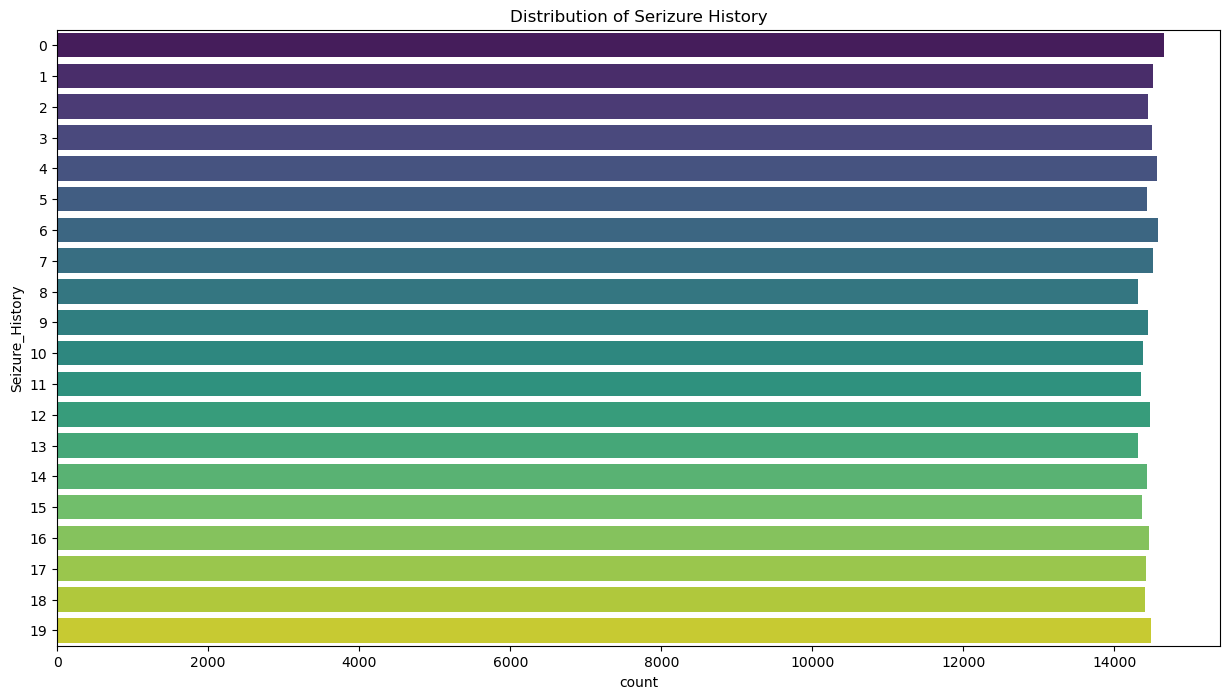

In [168]:
plt.figure(figsize=(15, 8))
sns.countplot(y=df['Seizure_History'], data=db, palette='viridis')
plt.title("Distribution of Serizure History")
plt.show()

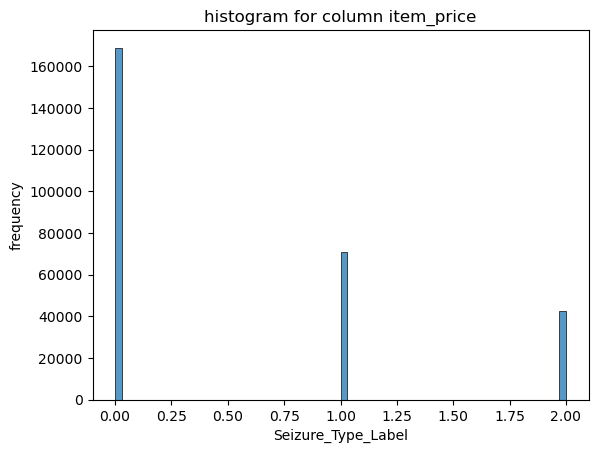

In [169]:
sns.histplot(db["Seizure_Type_Label"])
plt.title("histogram for column item_price")
plt.ylabel("frequency")
plt.show()

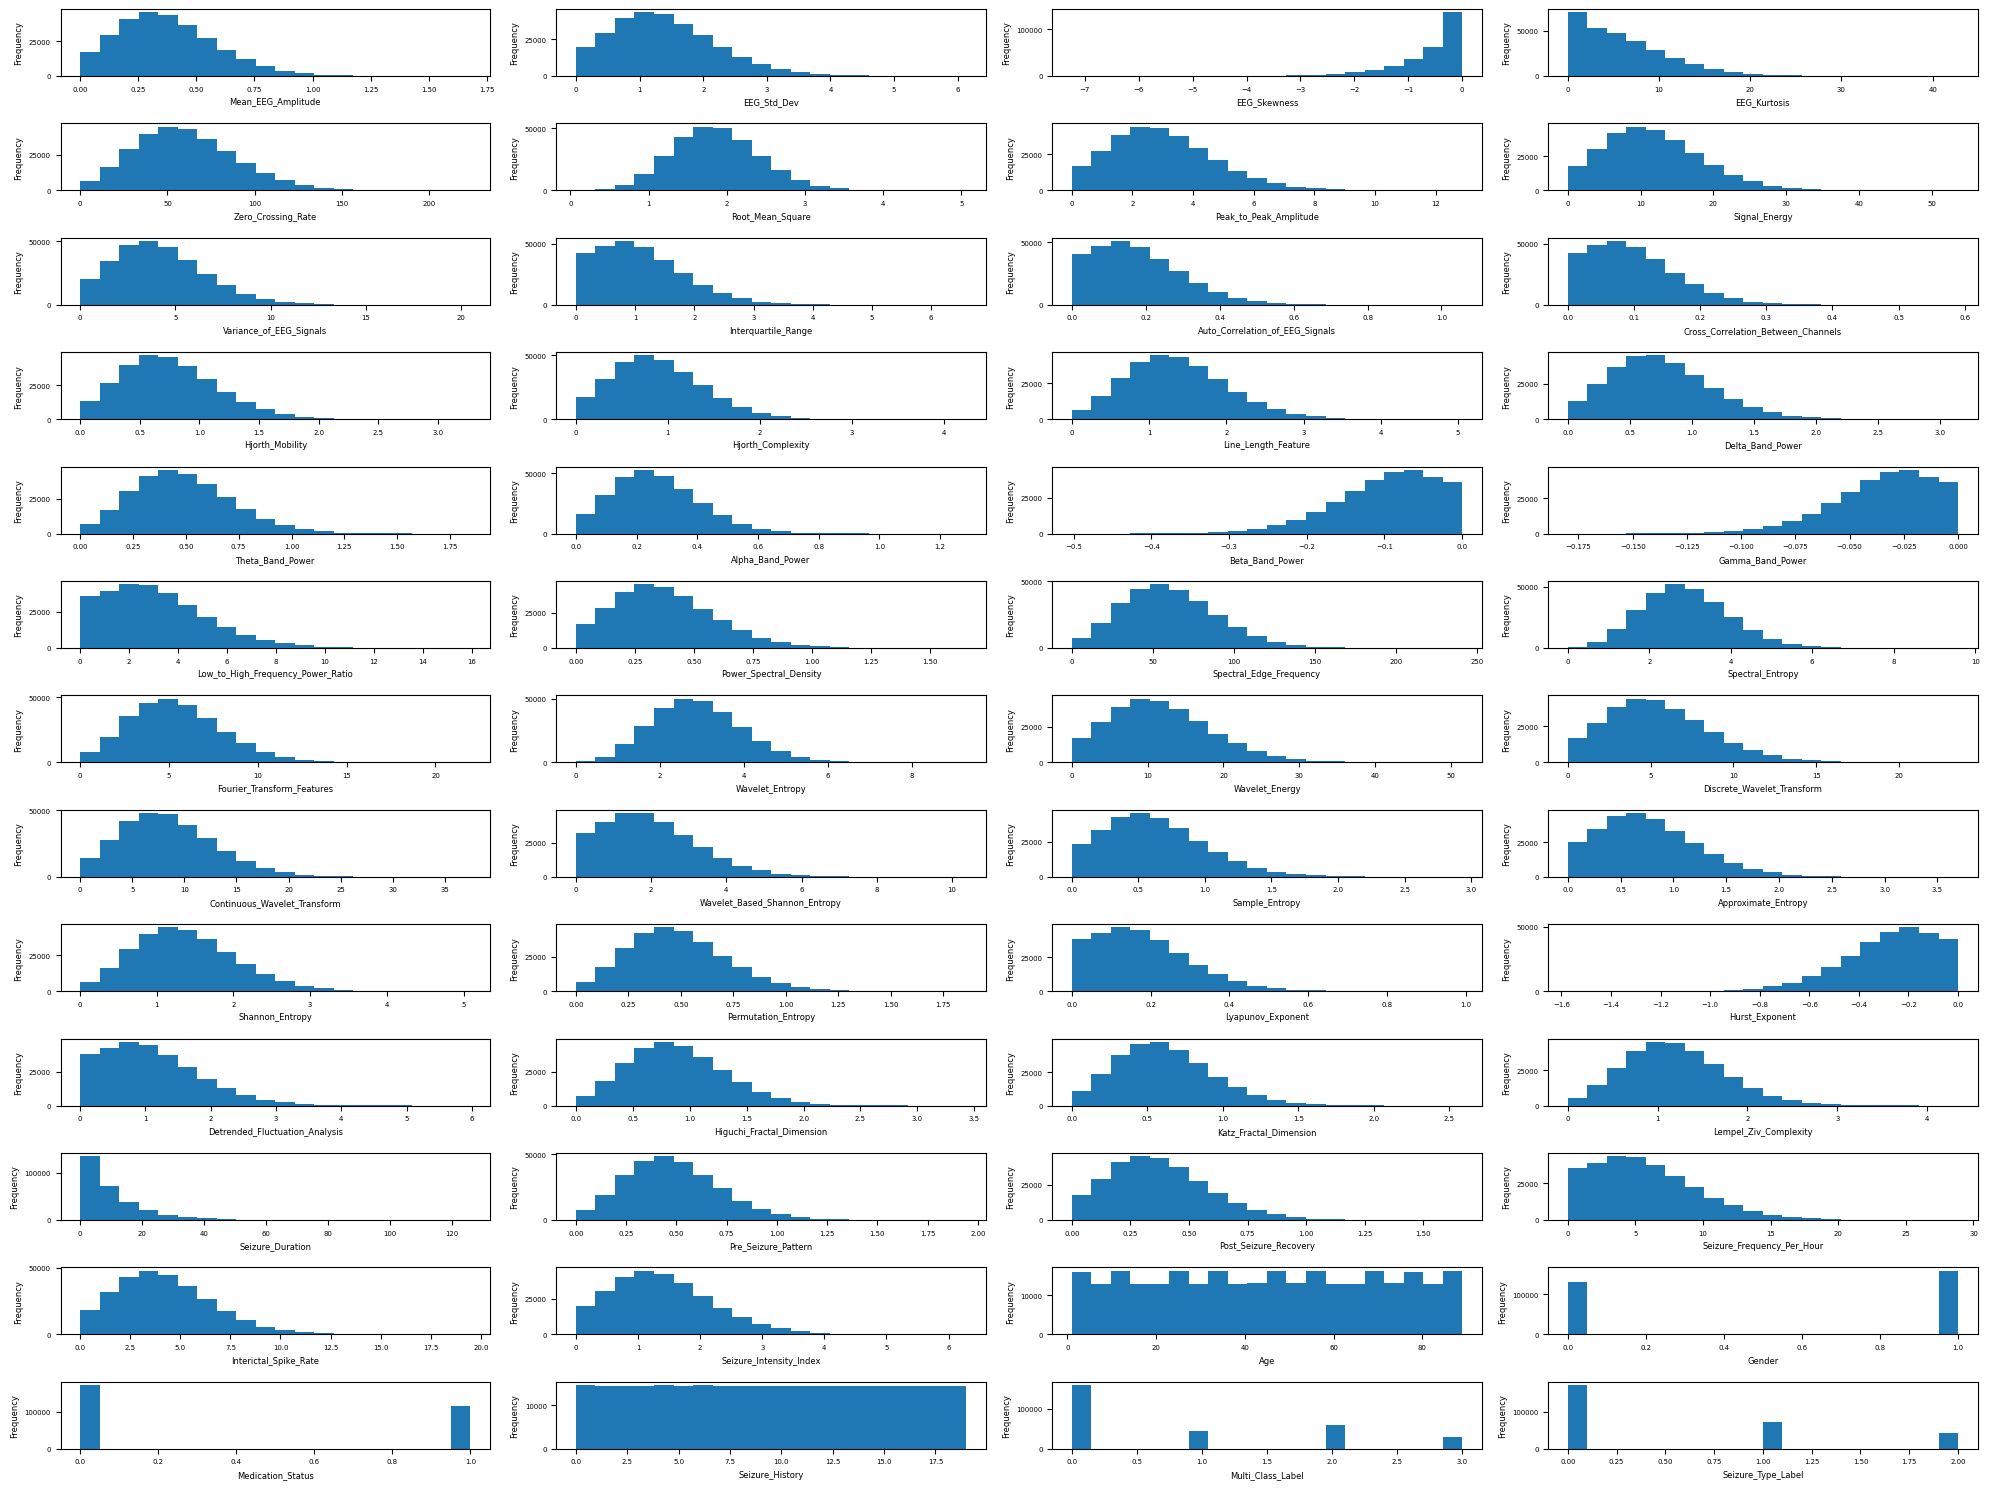

In [170]:
t = 1
plt.figure(figsize=(20, 15))  

for i in db.columns:
    plt.subplot(13, 4, t)  
    plt.hist(df[i], bins=20)  
    plt.xlabel(i, fontsize=6)
    plt.ylabel("Frequency", fontsize=6)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    t += 1

plt.tight_layout()
plt.show()

In [324]:
df1 = db.copy()
df1.shape

(157672, 52)

In [326]:
def get_age_group(age):
    if age <= 4:
        return 'Infant'
    elif age <= 11:
        return 'Child'
    elif age <=17:
        return 'Teen'
    elif age <=25:
        return 'YoungAdult'
    elif age <= 44:
        return ' Adult'
    elif age<=64:
        return 'Middle_Aged_Adult'
    else:
        return "Seinor"


df1['Age Group'] = df1['Age'].apply(get_age_group)

df1

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label,Age Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,87,0,1,18,0,2,Seinor
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,1,0,0,2,0,Infant
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,53,1,1,7,0,1,Middle_Aged_Adult
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,18,0,0,18,0,2,YoungAdult
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,12,1,1,3,1,1,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288998,0.333011,0.037461,-0.036043,0.200266,66.012970,1.500159,4.902551,1.657921,5.493665,1.243733,0.259649,0.132599,0.650593,1.256357,1.767730,0.701706,0.472871,0.473767,-0.025565,-0.034354,5.424500,0.088165,54.517558,2.876780,7.653254,0.697082,18.023460,3.009803,7.235323,1.395727,0.597087,0.315420,2.947344,0.255568,0.087614,-0.211479,0.851299,1.073162,0.179960,1.985299,6.966187,0.273751,0.176907,13.144455,6.043138,0.275713,21,0,0,14,0,0,YoungAdult
288999,0.320082,2.665153,-0.623097,2.661025,23.1

In [328]:
df1.drop(['Age'], axis=1 ,inplace= True)

In [330]:
df1['Seizure_Type_Label']= df1['Seizure_Type_Label'].replace({2:1})
df1

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label,Age Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,0,1,18,0,1,Seinor
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,0,0,2,0,Infant
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,1,1,7,0,1,Middle_Aged_Adult
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,0,0,18,0,1,YoungAdult
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,1,1,3,1,1,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288998,0.333011,0.037461,-0.036043,0.200266,66.012970,1.500159,4.902551,1.657921,5.493665,1.243733,0.259649,0.132599,0.650593,1.256357,1.767730,0.701706,0.472871,0.473767,-0.025565,-0.034354,5.424500,0.088165,54.517558,2.876780,7.653254,0.697082,18.023460,3.009803,7.235323,1.395727,0.597087,0.315420,2.947344,0.255568,0.087614,-0.211479,0.851299,1.073162,0.179960,1.985299,6.966187,0.273751,0.176907,13.144455,6.043138,0.275713,0,0,14,0,0,YoungAdult
288999,0.320082,2.665153,-0.623097,2.661025,23.165750,1.517971,1.346790,2

In [466]:
df1['Seizure_Type_Label'].unique()

array([1, 0])

In [334]:
# Count of records in each class for Seizure Type
print(df1['Seizure_Type_Label'].value_counts())
print()
print(df1['Seizure_Type_Label'].value_counts(normalize = True)*100)

Seizure_Type_Label
0    94240
1    63432
Name: count, dtype: int64

Seizure_Type_Label
0    59.769648
1    40.230352
Name: proportion, dtype: float64


In [336]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157672 entries, 0 to 289006
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Mean_EEG_Amplitude                  157672 non-null  float64
 1   EEG_Std_Dev                         157672 non-null  float64
 2   EEG_Skewness                        157672 non-null  float64
 3   EEG_Kurtosis                        157672 non-null  float64
 4   Zero_Crossing_Rate                  157672 non-null  float64
 5   Root_Mean_Square                    157672 non-null  float64
 6   Peak_to_Peak_Amplitude              157672 non-null  float64
 7   Signal_Energy                       157672 non-null  float64
 8   Variance_of_EEG_Signals             157672 non-null  float64
 9   Interquartile_Range                 157672 non-null  float64
 10  Auto_Correlation_of_EEG_Signals     157672 non-null  float64
 11  Cross_Correlation_Between_Chann

In [338]:
df1['Age Group'].unique()

array(['Seinor', 'Infant', 'Middle_Aged_Adult', 'YoungAdult', 'Teen',
       ' Adult', 'Child'], dtype=object)

In [340]:
df1['Age_Group']= df1['Age Group'].replace({'Infant':0 , 'Child':1, 'Teen':2 , 'YoungAdult':3 , ' Adult':4 , 'Middle_Aged_Adult':5 , 'Seinor':6})
df1

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label,Age Group,Age_Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,0,1,18,0,1,Seinor,6
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,0,0,2,0,Infant,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,1,1,7,0,1,Middle_Aged_Adult,5
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,0,0,18,0,1,YoungAdult,3
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,1,1,3,1,1,Teen,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288998,0.333011,0.037461,-0.036043,0.200266,66.012970,1.500159,4.902551,1.657921,5.493665,1.243733,0.259649,0.132599,0.650593,1.256357,1.767730,0.701706,0.472871,0.473767,-0.025565,-0.034354,5.424500,0.088165,54.517558,2.876780,7.653254,0.697082,18.023460,3.009803,7.235323,1.395727,0.597087,0.315420,2.947344,0.255568,0.087614,-0.211479,0.851299,1.073162,0.179960,1.985299,6.966187,0.273751,0.176907,13.144455,6.043138,0.275713,0,0,14,0,0,YoungAdult,3
288999,0.320082,2.665153,-0.623097,2.661025,23.

In [344]:
df1.drop(['Age Group'], axis=1 ,inplace= True)

In [346]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157672 entries, 0 to 289006
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Mean_EEG_Amplitude                  157672 non-null  float64
 1   EEG_Std_Dev                         157672 non-null  float64
 2   EEG_Skewness                        157672 non-null  float64
 3   EEG_Kurtosis                        157672 non-null  float64
 4   Zero_Crossing_Rate                  157672 non-null  float64
 5   Root_Mean_Square                    157672 non-null  float64
 6   Peak_to_Peak_Amplitude              157672 non-null  float64
 7   Signal_Energy                       157672 non-null  float64
 8   Variance_of_EEG_Signals             157672 non-null  float64
 9   Interquartile_Range                 157672 non-null  float64
 10  Auto_Correlation_of_EEG_Signals     157672 non-null  float64
 11  Cross_Correlation_Between_Chann

In [348]:
df2=df1.drop(columns=['Multi_Class_Label','Seizure_Type_Label'], axis=1)
df2.head()

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Gender,Medication_Status,Seizure_History,Age_Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,0,1,18,6
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,0,0,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,1,1,7,5
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,0,0,18,3
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,1,1,3,2


In [350]:
df2

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Gender,Medication_Status,Seizure_History,Age_Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,0,1,18,6
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,0,0,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,1,1,7,5
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,0,0,18,3
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288998,0.333011,0.037461,-0.036043,0.200266,66.012970,1.500159,4.902551,1.657921,5.493665,1.243733,0.259649,0.132599,0.650593,1.256357,1.767730,0.701706,0.472871,0.473767,-0.025565,-0.034354,5.424500,0.088165,54.517558,2.876780,7.653254,0.697082,18.023460,3.009803,7.235323,1.395727,0.597087,0.315420,2.947344,0.255568,0.087614,-0.211479,0.851299,1.073162,0.179960,1.985299,6.966187,0.273751,0.176907,13.144455,6.043138,0.275713,0,0,14,3
288999,0.320082,2.665153,-0.623097,2.661025,23.165750,1.517971,1.346790,22.536772,5.324387,0.509484,0.172841,0.055776,0.635850,0.727912,2.139822,1.141821,0.479301,0.256321,-0.089407,-0.0273

In [352]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame() 
vif_data["Feature"] = df2.columns 
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])] 

vif_data
vif_data = vif_data.sort_values(by="VIF", ascending=False)


In [354]:
vif_data

,Feature,VIF
5,Root_Mean_Square,12.325880
23,Spectral_Entropy,8.587804
25,Wavelet_Entropy,8.575741
49,Age_Group,6.339219
39,Lempel_Ziv_Complexity,5.960046
37,Higuchi_Fractal_Dimension,5.604994
33,Permutation_Entropy,5.599984
4,Zero_Crossing_Rate,5.593294
22,Spectral_Edge_Frequency,5.589161
24,Fourier_Transform_Features,5.588895


In [592]:
data=["Root_Mean_Square",
	"Wavelet_Entropy",
	"Spectral_Entropy",
	"Age_Group",
	"Lempel_Ziv_Complexity",
	"Spectral_Edge_Frequency",
	"Permutation_Entropy",
	"Pre_Seizure_Pattern",
	"Higuchi_Fractal_Dimension",
	"Fourier_Transform_Features",
	"Theta_Band_Power",
	"Seizure_Type_Label"]

In [594]:
df2 = df1.filter(items=data)
df2

,Root_Mean_Square,Wavelet_Entropy,Spectral_Entropy,Age_Group,Lempel_Ziv_Complexity,Spectral_Edge_Frequency,Permutation_Entropy,Pre_Seizure_Pattern,Higuchi_Fractal_Dimension,Fourier_Transform_Features,Theta_Band_Power,Seizure_Type_Label
0,2.552078,2.293538,4.427274,6,0.372334,77.759558,0.501950,0.298005,1.459174,7.306757,0.567625,1
1,1.968715,4.381704,3.222652,0,0.683109,102.998174,0.165673,0.232762,0.688578,7.470282,0.404474,0
2,2.226112,2.762652,3.351570,5,1.628583,84.668546,0.152374,0.456977,0.970989,6.219103,0.194077,1
3,2.349506,2.302283,2.434615,3,1.369905,5.286621,0.650423,0.220526,0.813145,2.580545,0.143506,1
4,1.994878,3.496721,3.083250,2,0.684325,86.937180,0.307572,0.174483,0.317994,4.888853,0.494980,1
...,...,...,...,...,...,...,...,...,...,...,...,...
288998,1.500159,0.697082,2.876780,3,1.985299,54.517558,0.255568,0.273751,1.073162,7.653254,0.472871,0
288999,1.517971,2.661709,1.140329,4,0.875066,63.504640,0.331524,0.863086,0.656481,4.981324,0.479301,0
289004,1.675556,3.953034,2.772417,0,2.354692,17.575377,0.287093,0.423658,0.958940,11.294767,0.930360,0
289005,1.604341,2.763986,3.954847,6,2.157022,83.256304,0.346829,0.108117,1.319603,4.421750,0.215347,0


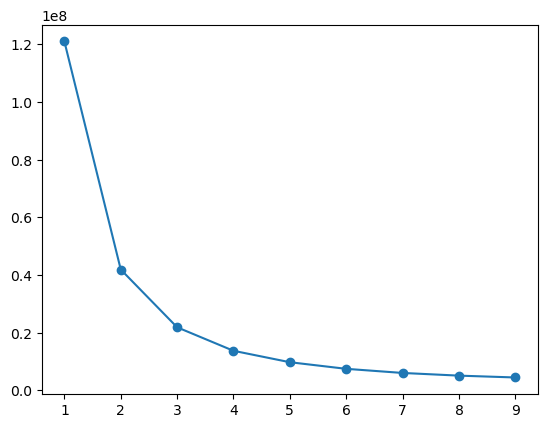

In [460]:
from sklearn.cluster import KMeans
err=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,random_state=23)
    km.fit(df2)
    err.append(km.inertia_)
err
plt.plot(range(1,10),err,marker="o")

In [428]:
kmeans = KMeans(n_clusters=3) 
kmeans_labels = kmeans.fit_predict(df1)

In [432]:
df1['seizure_label'] = kmeans_labels 
# Interpret clusters 
df1

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,Auto_Correlation_of_EEG_Signals,Cross_Correlation_Between_Channels,Hjorth_Mobility,Hjorth_Complexity,Line_Length_Feature,Delta_Band_Power,Theta_Band_Power,Alpha_Band_Power,Beta_Band_Power,Gamma_Band_Power,Low_to_High_Frequency_Power_Ratio,Power_Spectral_Density,Spectral_Edge_Frequency,Spectral_Entropy,Fourier_Transform_Features,Wavelet_Entropy,Wavelet_Energy,Discrete_Wavelet_Transform,Continuous_Wavelet_Transform,Wavelet_Based_Shannon_Entropy,Sample_Entropy,Approximate_Entropy,Shannon_Entropy,Permutation_Entropy,Lyapunov_Exponent,Hurst_Exponent,Detrended_Fluctuation_Analysis,Higuchi_Fractal_Dimension,Katz_Fractal_Dimension,Lempel_Ziv_Complexity,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label,Age_Group,seizure_label
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,0.230933,0.136317,0.710989,2.183192,1.004372,1.207438,0.567625,0.524007,-0.161284,-0.039924,1.741657,0.332283,77.759558,4.427274,7.306757,2.293538,12.237743,2.833461,10.338299,4.087257,0.669797,0.602838,1.925348,0.501950,0.248701,-0.237029,0.084268,1.459174,0.459652,0.372334,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,0,1,18,0,1,6,2
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,0.063214,0.079108,0.923336,0.446129,2.159020,0.241474,0.404474,0.074329,-0.111100,-0.037773,0.061087,0.179559,102.998174,3.222652,7.470282,4.381704,5.948213,3.344317,7.926818,3.318318,1.217503,0.478108,1.455698,0.165673,0.224135,-0.253597,2.091604,0.688578,0.177741,0.683109,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,0,0,2,0,0,2
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,0.043537,0.075677,0.397337,1.902939,0.201200,0.463070,0.194077,0.122737,-0.046285,-0.024686,4.851740,0.653697,84.668546,3.351570,6.219103,2.762652,9.131829,5.839558,3.146635,2.282921,1.053150,0.926617,1.829170,0.152374,0.205119,-0.562112,1.638041,0.970989,0.780171,1.628583,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,1,1,7,0,1,5,2
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,0.163113,0.122203,0.492076,0.840896,0.832678,0.831719,0.143506,0.024136,-0.055812,-0.052281,6.874577,0.322266,5.286621,2.434615,2.580545,2.302283,12.123970,2.512876,9.019375,1.270328,1.296942,1.123526,0.672597,0.650423,0.131535,-0.075294,0.819848,0.813145,0.959261,1.369905,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,0,0,18,0,1,3,1
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,0.156901,0.155604,1.054887,1.189594,1.781949,1.396656,0.494980,0.243004,-0.073291,-0.015447,4.089783,0.327775,86.937180,3.083250,4.888853,3.496721,2.341484,3.611934,6.272549,3.133159,0.855940,0.032101,0.513832,0.307572,0.155513,-0.172345,1.779324,0.317994,0.624070,0.684325,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,1,1,3,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288998,0.333011,0.037461,-0.036043,0.200266,66.012970,1.500159,4.902551,1.657921,5.493665,1.243733,0.259649,0.132599,0.650593,1.256357,1.767730,0.701706,0.472871,0.473767,-0.025565,-0.034354,5.424500,0.088165,54.517558,2.876780,7.653254,0.697082,18.023460,3.009803,7.235323,1.395727,0.597087,0.315420,2.947344,0.255568,0.087614,-0.211479,0.851299,1.073162,0.179960,1.985299,6.966187,0.273751,0.176907,13.144455,6.043138,0.275713,0,0,14,0,0,3,1
288999,0.320082,2.665153,-0.623097,2.661025,23.165750,1.517971,1.346790,22.536772,5.324387

#### PCA

In [246]:
cov_matrix=np.cov(df1.T) 
cov_matrix

array([[ 3.02311318e-01, -6.93329935e-05,  2.42216841e-04,
        -3.85693882e-03,  2.99783199e-04,  6.35496831e-03,
        -2.86123704e-05, -8.45647543e-05,  4.14395884e-04,
         2.02067618e-03,  2.13451257e-04, -6.35928989e-04,
         4.35486628e-04, -5.75547236e-02,  1.42212437e-04,
         6.97744968e-05,  6.21779031e-04,  3.77651851e-03,
        -6.19038275e-04, -7.85303971e-04,  3.07834513e-05,
         1.45565695e-03, -5.21354573e-03, -8.52999468e-05,
        -2.91091208e-03, -2.33862355e-04,  7.22550538e-04,
         1.81504493e-03,  4.30784787e-04, -4.10974367e-04],
       [-6.93329935e-05,  1.11448392e+00,  1.81087294e-03,
         8.22762793e-04,  5.82150831e-04,  5.17955073e-02,
         4.26005108e-05, -1.20987989e-04,  1.15984633e-03,
         1.03398181e-03, -5.79007839e-05, -2.00582370e-04,
         7.45554665e-04, -2.29365901e-02, -1.47835054e-04,
         1.82142347e-04, -7.41519925e-04, -9.01672001e-04,
        -8.83942928e-04, -1.12015156e-03,  6.36372482e-

In [248]:
eigval,eigvect=np.linalg.eig(cov_matrix) 

In [250]:
eigval

array([8.27898560e+02, 8.26562987e+02, 4.36686002e+01, 4.38543453e+01,
       1.97039011e+01, 9.42132019e+00, 6.62840415e+00, 5.48351145e+00,
       5.45848232e+00, 3.10554312e+00, 2.79351084e+00, 1.11796485e+00,
       1.11352860e+00, 4.24206986e-01, 4.24816996e-01, 3.02335383e-01,
       2.98404472e-01, 2.41838855e-01, 2.40150307e-01, 1.78537043e-01,
       1.57238164e-01, 1.57798340e-01, 9.57717461e-02, 1.96737303e-02,
       4.34272113e-02, 4.37008180e-02, 4.37951390e-02, 5.32020938e-02,
       5.26658316e-02, 5.27410944e-02])

In [34]:
eigvect

array([[ 4.52239886e-06, -2.65306305e-06,  1.57768922e-05, ...,
        -8.24259975e-03, -1.11903905e-02, -8.78250814e-03],
       [-4.77301173e-05,  3.84689072e-05, -3.82390346e-05, ...,
        -1.19974531e-03, -3.64663485e-04, -1.20666676e-04],
       [-1.61956782e-05,  1.07677090e-05, -1.76261559e-05, ...,
         9.64105620e-04, -5.52471262e-06,  1.45257850e-03],
       ...,
       [ 2.21205402e-05, -2.04797758e-05,  6.78960526e-05, ...,
        -2.00542454e-04,  2.39428713e-03,  3.36143881e-04],
       [-4.66558883e-04, -1.10707296e-03,  1.78131391e-04, ...,
        -5.33949197e-05, -1.00188621e-05, -4.31769241e-05],
       [-2.47048642e-05, -1.04645568e-05, -4.47821565e-04, ...,
        -4.30942262e-05, -5.81215978e-05, -1.56717611e-05]])

In [252]:
tot = sum(eigval)
tot

1799.6409632572736

In [36]:
var_exp = [(i/tot)*100 for i in sorted(eigval, reverse=True)]
var_exp

[42.23716134797776,
 42.16897312396235,
 4.032024594597885,
 2.237307933018873,
 2.2278554881115764,
 1.7003669968485509,
 1.2488054243850446,
 1.0052362628460154,
 0.7344678429672291,
 0.48064005662488685,
 0.33815320636451024,
 0.27975458234464234,
 0.2784893037398906,
 0.2172622919206235,
 0.15843258814272615,
 0.1425216382261705,
 0.08076582426266928,
 0.05703672124602117,
 0.056809053724291,
 0.0333731020791555,
 0.03319814004974263,
 0.027240805576353066,
 0.027005087905067376,
 0.021672293122335477,
 0.02164127067809059,
 0.018704831894426822,
 0.015423210195231962,
 0.01522307882252858,
 0.012637081125586376,
 0.012318845871548894,
 0.012236118588654197,
 0.01076680825478426,
 0.00910779212067224,
 0.008049545483735163,
 0.008021125077787216,
 0.00698943332067693,
 0.00488582592358223,
 0.0027140095177087416,
 0.0026905765201697732,
 0.002686702632730008,
 0.0022342456731486095,
 0.002229438901376693,
 0.002215424952004858,
 0.0017381534564121547,
 0.0010037128451637364,
 0.000

In [254]:
cum_exp_var = np.round(np.cumsum(var_exp),3)
cum_exp_var

array([ 42.237,  84.406,  88.438,  90.675,  92.903,  94.604,  95.852,
        96.858,  97.592,  98.073,  98.411,  98.691,  98.969,  99.186,
        99.345,  99.487,  99.568,  99.625,  99.682,  99.715,  99.749,
        99.776,  99.803,  99.825,  99.846,  99.865,  99.88 ,  99.896,
        99.908,  99.921,  99.933,  99.944,  99.953,  99.961,  99.969,
        99.976,  99.981,  99.983,  99.986,  99.989,  99.991,  99.993,
        99.995,  99.997,  99.998,  99.999, 100.   , 100.   , 100.   ,
       100.   ])

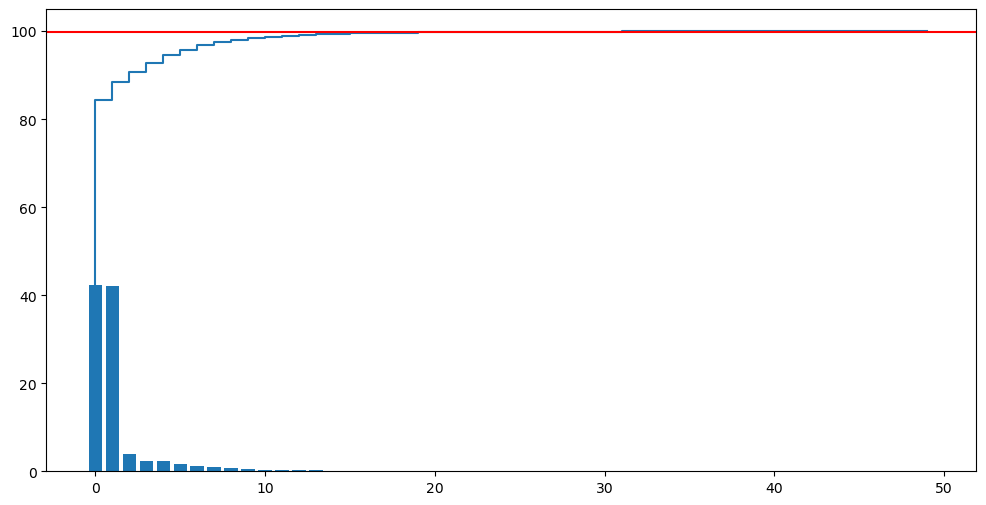

In [256]:
plt.figure(figsize=(12,6))
plt.bar(range(50) , var_exp)
plt.step(range(50), cum_exp_var)
plt.axhline(99.9, c='red')
plt.show()

In [596]:
from sklearn.decomposition import PCA 
mypca=PCA(n_components=0.999) 

pca1=mypca.fit_transform(df2) 
pca1_df=pd.DataFrame(pca1,index=df2.index) 
pca1_df.head()  

,0,1,2,3,4,5,6
0,17.999419,1.965642,1.854842,1.521465,0.670104,0.692830,-0.816269
1,43.238488,2.130693,-4.147716,-0.785837,1.330232,0.113211,-0.492733
2,24.908335,0.878920,0.853924,0.422994,0.258525,0.366694,0.440421
3,-54.473931,-2.750790,-1.150282,0.076390,-0.703372,0.491323,0.182250
4,27.177046,-0.450000,-2.148430,-0.277953,0.596851,0.133430,-0.503632


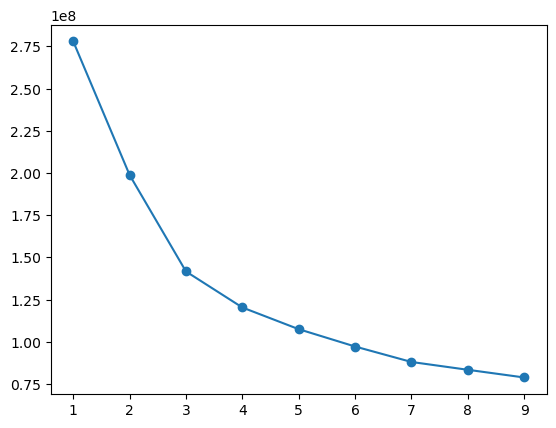

In [426]:
from sklearn.cluster import KMeans
err=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,random_state=23)
    km.fit(df1)
    err.append(km.inertia_)
err
plt.plot(range(1,10),err,marker="o")

In [598]:
y= df2["Seizure_Type_Label"]
x= df2.drop("Seizure_Type_Label",axis=1)

In [600]:
y.value_counts(normalize = True)*100

Seizure_Type_Label
0    59.769648
1    40.230352
Name: proportion, dtype: float64

In [602]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.2, stratify = y, shuffle = True)

In [538]:
from sklearn.preprocessing  import StandardScaler
s=StandardScaler()
xtraind=s.fit_transform(xtrain)
xtrain_df=pd.DataFrame(xtraind,columns=xtrain.columns)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
xtestd=s.fit_transform(xtest)
xtest_df=pd.DataFrame(xtestd,columns=xtest.columns)

In [280]:
# Type your answer
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame() 
vif_data["Feature"] = xtrain.columns 
vif_data["VIF"] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])] 

vif_data

,Feature,VIF
0,0,1.000012
1,1,1.000021
2,2,1.000014
3,3,1.000008
4,4,1.000013
5,5,1.000010
6,6,1.000009
7,7,1.000014
8,8,1.000017
9,9,1.000013


In [90]:
ypred=lr.predict(xtest_df)

In [92]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     33782
           1       0.00      0.00      0.00     22661

    accuracy                           0.60     56443
   macro avg       0.30      0.50      0.37     56443
weighted avg       0.36      0.60      0.45     56443



In [648]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',n_estimators=90,max_depth=10,min_samples_split=2)
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=90)

In [646]:
from sklearn.model_selection import GridSearchCV
params={"criterion":['entropy', 'gini'],"n_estimators":[90, 100, 150, 200],"max_depth":[10, 15, 20],"min_samples_split":[2, 5, 8]}
grid_rf=GridSearchCV(estimator=rf,param_grid=params,scoring="accuracy",cv=5)
grid_rf.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [606]:
ypred=rf.predict(xtest)

In [608]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73     18848
           1       0.38      0.06      0.11     12687

    accuracy                           0.58     31535
   macro avg       0.49      0.50      0.42     31535
weighted avg       0.51      0.58      0.48     31535



In [570]:
feature_importances = pd.Series(rf.feature_importances_, index=xtrain.columns)
feature_importances 

Root_Mean_Square    0.333765
Spectral_Entropy    0.332799
Wavelet_Entropy     0.333436
dtype: float64

In [610]:
from sklearn.tree import DecisionTreeClassifier  
dtc= DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [612]:
ypred=dtc.predict(xtest)

In [614]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60     18848
           1       0.41      0.41      0.41     12687

    accuracy                           0.52     31535
   macro avg       0.50      0.50      0.50     31535
weighted avg       0.52      0.52      0.52     31535



In [616]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(xtrain,ytrain)

AdaBoostClassifier()

In [618]:
ypred=abc.predict(xtest)

In [620]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     18848
           1       0.00      0.00      0.00     12687

    accuracy                           0.60     31535
   macro avg       0.30      0.50      0.37     31535
weighted avg       0.36      0.60      0.45     31535



In [622]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(xtrain,ytrain)


BaggingClassifier()

In [624]:
ypred=bc.predict(xtest)

In [626]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69     18848
           1       0.41      0.20      0.27     12687

    accuracy                           0.56     31535
   macro avg       0.50      0.50      0.48     31535
weighted avg       0.52      0.56      0.52     31535



In [642]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=150,metric='manhattan')
knn.fit(xtrain,ytrain)
from sklearn.metrics import roc_curve,roc_auc_score

ypred=knn.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75     18848
           1       0.40      0.01      0.02     12687

    accuracy                           0.60     31535
   macro avg       0.50      0.50      0.38     31535
weighted avg       0.52      0.60      0.45     31535



In [644]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     18848
           1       0.00      0.00      0.00     12687

    accuracy                           0.60     31535
   macro avg       0.30      0.50      0.37     31535
weighted avg       0.36      0.60      0.45     31535



In [628]:
from xgboost import XGBClassifier 
xgb= XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [630]:
ypred=xgb.predict(xtest)

In [632]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.91      0.72     18848
           1       0.39      0.08      0.14     12687

    accuracy                           0.58     31535
   macro avg       0.49      0.50      0.43     31535
weighted avg       0.51      0.58      0.49     31535



In [634]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [373]:
ypred=gbc.predict(xtest)

In [374]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     33782
           1       0.46      0.00      0.00     22661

    accuracy                           0.60     56443
   macro avg       0.53      0.50      0.38     56443
weighted avg       0.54      0.60      0.45     56443



In [375]:
df1["Seizure_Type_Label"].unique()


array([1, 0])

In [376]:
df3=data.copy()

In [377]:
df3

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,...,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,...,0.382942,3.250527,6.405068,0.686015,87,0,1,18,0,2
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,...,0.423757,9.210367,3.192447,0.944232,1,1,0,0,2,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,...,0.407296,3.212498,4.143878,0.288099,53,1,1,7,0,1
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,...,0.184500,1.310543,7.854328,1.463863,18,0,0,18,0,2
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,...,0.368572,6.087262,1.659506,0.121632,12,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289005,0.736238,1.304797,-0.007116,0.048795,63.302061,1.604341,2.391012,2.496988,2.664543,1.067120,...,0.245607,7.536210,8.586816,0.109013,80,0,0,10,2,0
289006,0.199989,1.554030,-0.136011,7.393583,52.130128,1.708409,2.551553,17.728261,3.885055,0.068847,...,0.363540,2.800535,3.703395,1.729608,64,0,0,9,3,2
289007,0.266252,1.257519,-1.210691,8.618731,82.788910,2.051640,0.819043,13.814043,9.074392,0.590364,...,0.102549,7.097035,2.505677,1.147862,49,1,1,14,0,0
289008,0.512599,0.983766,-0.013224,6.468284,8.176885,0.935870,4.605217,18.540305,4.702773,0.506150,...,0.084163,12.546747,2.828676,1.833845,39,0,0,4,0,0


In [378]:
df4=db[db["Seizure_Type_Label"]!=0]
df4

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,...,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,...,0.382942,3.250527,6.405068,0.686015,87,0,1,18,0,2
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,...,0.407296,3.212498,4.143878,0.288099,53,1,1,7,0,1
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,...,0.184500,1.310543,7.854328,1.463863,18,0,0,18,0,2
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,...,0.368572,6.087262,1.659506,0.121632,12,1,1,3,1,1
7,0.528269,1.507646,-1.108512,11.772940,136.354359,1.990268,2.498877,7.879732,5.469504,0.792115,...,0.515635,7.453610,9.635709,1.300431,54,0,0,19,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288990,0.592209,1.281538,-0.827417,1.535952,79.007279,2.123206,3.807452,25.762843,3.165643,0.427807,...,0.235682,4.276952,6.728431,2.094761,39,0,0,1,0,2
288991,0.000242,0.062897,-1.367265,8.538764,45.083015,1.856058,2.992843,10.914296,6.903559,0.906559,...,0.506967,4.243355,1.996319,2.811139,1,1,1,14,2,1
288996,0.456546,1.715454,-0.161059,4.499498,125.044176,2.534033,1.979730,10.283933,4.826447,1.274684,...,0.201980,3.114767,3.811716,0.582222,4,0,0,16,0,2
289003,0.014729,0.740841,-1.977500,15.234978,59.369677,2.627923,4.006174,17.929488,7.060629,1.580461,...,0.584300,9.573545,3.424118,1.733077,51,0,0,1,2,1


In [379]:
y = df4['Seizure_Type_Label']
x= df4.drop("Seizure_Type_Label",axis=1)

In [380]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=45,test_size=0.2, stratify = y, shuffle = True)

In [381]:
from sklearn.tree import DecisionTreeClassifier  
dtc= DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [382]:
y_pred=dtc.predict(xtest)

In [383]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           1       0.62      0.63      0.63     14044
           2       0.39      0.38      0.38      8618

    accuracy                           0.53     22662
   macro avg       0.51      0.51      0.51     22662
weighted avg       0.53      0.53      0.53     22662



In [384]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [385]:
y_predg=gbc.predict(xtest)

In [386]:
print(classification_report(y_predg,ytest))

              precision    recall  f1-score   support

           1       1.00      0.62      0.77     22642
           2       0.00      0.40      0.00        20

    accuracy                           0.62     22662
   macro avg       0.50      0.51      0.39     22662
weighted avg       1.00      0.62      0.77     22662



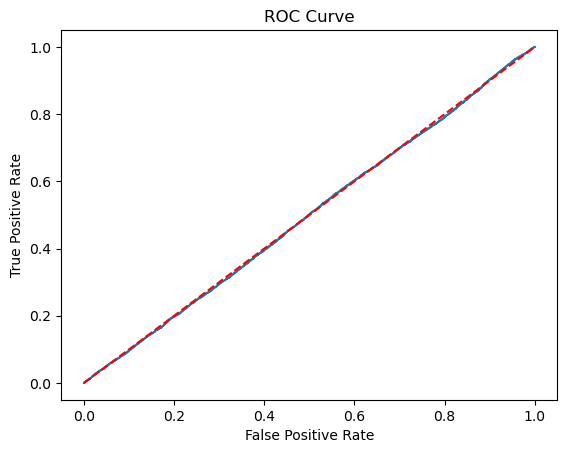

In [387]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Convert ytest from {1, 2} to {0, 1}
ytest_binary = ytest.replace({1: 0, 2: 1})  # or vice versa depending on your positive class

# Predict probabilities
predp = gbc.predict_proba(xtest)[:, 1]

# Plot ROC
fpr, tpr, threshold = roc_curve(ytest_binary, predp)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [388]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(xtrain,ytrain)

BaggingClassifier()

In [389]:
y_pred=bc.predict(xtest)

In [390]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           1       0.85      0.62      0.72     19346
           2       0.15      0.37      0.21      3316

    accuracy                           0.59     22662
   macro avg       0.50      0.50      0.47     22662
weighted avg       0.75      0.59      0.65     22662



In [391]:
from sklearn.decomposition import PCA 
mypca=PCA(n_components=0.9990) 
pca1=mypca.fit_transform(x) 
pca1_df=pd.DataFrame(pca1) 
pca1_df.head()   

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-8.202539,16.927299,41.916771,-8.093303,2.097387,4.830327,8.606390,-4.762958,2.021335,-2.369783,...,-1.013545,0.845274,-0.010114,-0.703646,-0.394930,1.347065,-0.192615,0.641771,-1.346797,0.570247
1,-27.780636,23.251550,7.639134,-9.011647,-4.156037,-3.516984,-2.396792,1.124891,-5.297666,-2.503709,...,-0.151377,0.146378,-1.207459,-0.874235,0.315645,-0.442295,-1.003175,0.771209,-0.131988,0.394806
2,23.333078,-54.614366,-26.680405,-8.049231,1.054573,1.740961,8.523963,-5.473677,0.660117,-4.370725,...,-0.137087,-0.830489,-0.419810,0.174520,-0.277370,0.124897,-0.712214,-0.501502,-0.574068,0.475992
3,-22.226370,25.708286,-33.304496,-0.936657,-10.415417,-0.798344,-6.298334,-4.911507,-2.258344,0.423832,...,0.429997,0.453816,-0.435098,-1.242736,0.289231,-0.729466,0.139918,-0.949996,-0.573817,0.082664
4,75.941934,-7.033721,10.077546,15.484984,-2.985885,-3.241708,9.335026,5.595363,3.850756,1.729561,...,-0.163016,-1.969557,0.111206,-0.052843,-0.987086,0.285076,-0.348810,0.992878,-0.525771,0.121248


In [392]:
y = df4['Seizure_Type_Label']
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(pca1_df,y,random_state=45,test_size=0.2, stratify = y, shuffle = True)

In [393]:
from sklearn.tree import DecisionTreeClassifier  
dtc= DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [394]:
ytest

273480    1
200210    1
29491     1
140723    1
107357    2
         ..
105190    1
167448    1
226811    1
2477      2
272461    1
Name: Seizure_Type_Label, Length: 22662, dtype: int64

In [395]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

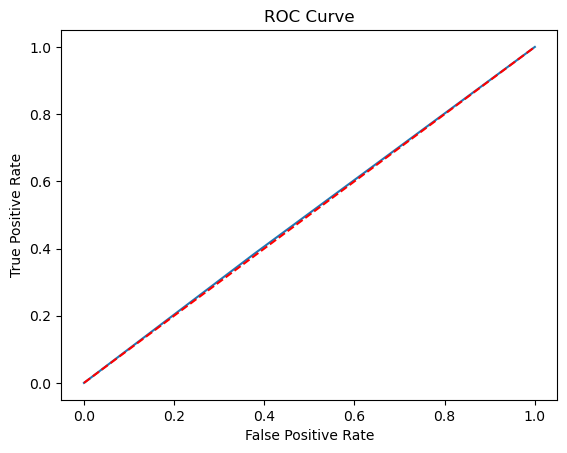

In [396]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Convert ytest from {1, 2} to {0, 1}
# ytest_binary = ytest.replace({1: 0, 2: 1})  # or vice versa depending on your positive class

# Predict probabilities
predp = dtc.predict_proba(xtest)[:, 1]

from sklearn.metrics import roc_curve

# Assume predp = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, predp, pos_label=2)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [397]:
y_predd=dtc.predict(xtest)

In [398]:
print(classification_report(y_predd,ytest))

              precision    recall  f1-score   support

           1       0.62      0.63      0.62     14025
           2       0.39      0.38      0.38      8637

    accuracy                           0.53     22662
   macro avg       0.50      0.50      0.50     22662
weighted avg       0.53      0.53      0.53     22662



In [399]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier(n_estimators=50)
bc.fit(xtrain,ytrain)

BaggingClassifier(n_estimators=50)

In [400]:
y_predb=bc.predict(xtest)

In [401]:
print(classification_report(y_predb,ytest))

              precision    recall  f1-score   support

           1       0.94      0.62      0.75     21339
           2       0.06      0.37      0.10      1323

    accuracy                           0.61     22662
   macro avg       0.50      0.50      0.42     22662
weighted avg       0.89      0.61      0.71     22662



In [402]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(ytrain), y=ytrain)
class_weight_dict = dict(zip(np.unique(ytrain), class_weights))

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(xtrain, ytrain)

rf.fit(X_train_bal, y_train_bal)

y_pred = rf.predict(xtest)

In [403]:
y_pred

array([1, 2, 1, ..., 1, 2, 1])

In [404]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           1       0.79      0.62      0.70     17853
           2       0.21      0.37      0.27      4809

    accuracy                           0.57     22662
   macro avg       0.50      0.50      0.48     22662
weighted avg       0.66      0.57      0.61     22662



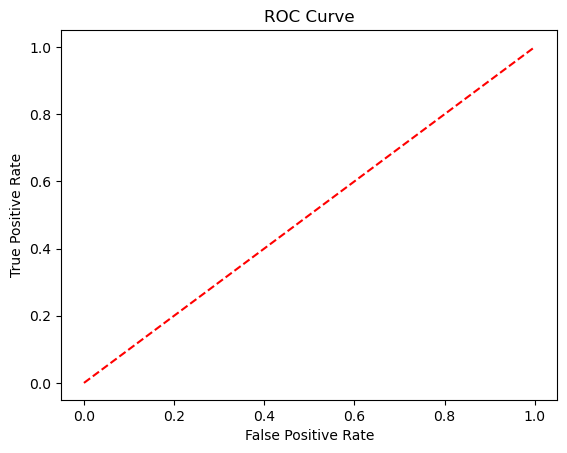

In [405]:
# Plot ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Convert ytest from {1, 2} to {0, 1}
  # or vice versa depending on your positive class

# Predict probabilities
predp = rf.predict_proba(xtest)[:, 1]

# Plot ROC
fpr, tpr, threshold = roc_curve(ytest_binary, predp,pos_label=2)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()